In [1]:
!pip install datasets
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 re

In [2]:
from datasets import load_dataset

dataset = load_dataset("wmt17", "ru-en")

README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

ru-en/train-00000-of-00023.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

ru-en/train-00001-of-00023.parquet:   0%|          | 0.00/139M [00:00<?, ?B/s]

ru-en/train-00002-of-00023.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

ru-en/train-00003-of-00023.parquet:   0%|          | 0.00/211M [00:00<?, ?B/s]

ru-en/train-00004-of-00023.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

ru-en/train-00005-of-00023.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

ru-en/train-00006-of-00023.parquet:   0%|          | 0.00/204M [00:00<?, ?B/s]

ru-en/train-00007-of-00023.parquet:   0%|          | 0.00/211M [00:00<?, ?B/s]

ru-en/train-00008-of-00023.parquet:   0%|          | 0.00/211M [00:00<?, ?B/s]

ru-en/train-00009-of-00023.parquet:   0%|          | 0.00/209M [00:00<?, ?B/s]

ru-en/train-00010-of-00023.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

ru-en/train-00011-of-00023.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

ru-en/train-00012-of-00023.parquet:   0%|          | 0.00/213M [00:00<?, ?B/s]

ru-en/train-00013-of-00023.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

ru-en/train-00014-of-00023.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

ru-en/train-00015-of-00023.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

ru-en/train-00016-of-00023.parquet:   0%|          | 0.00/210M [00:00<?, ?B/s]

ru-en/train-00017-of-00023.parquet:   0%|          | 0.00/218M [00:00<?, ?B/s]

ru-en/train-00018-of-00023.parquet:   0%|          | 0.00/222M [00:00<?, ?B/s]

ru-en/train-00019-of-00023.parquet:   0%|          | 0.00/224M [00:00<?, ?B/s]

ru-en/train-00020-of-00023.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

ru-en/train-00021-of-00023.parquet:   0%|          | 0.00/217M [00:00<?, ?B/s]

ru-en/train-00022-of-00023.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

ru-en/validation-00000-of-00001.parquet:   0%|          | 0.00/587k [00:00<?, ?B/s]

ru-en/test-00000-of-00001.parquet:   0%|          | 0.00/587k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24782720 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2998 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3001 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/22 [00:00<?, ?it/s]

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-ru", use_fast=True)


def collate_fn(batch):
    src_texts = [item['translation']['en'] for item in batch]
    tgt_texts = [item['translation']['ru'] for item in batch]

    src_encodings = tokenizer(src_texts, truncation=True, padding="longest", max_length=128, return_tensors="pt", add_special_tokens=True)
    tgt_encodings = tokenizer(tgt_texts, truncation=True, padding="longest", max_length=128, return_tensors="pt", add_special_tokens=True)

    input_ids = src_encodings['input_ids']     
    target_ids = tgt_encodings['input_ids']

    return input_ids, target_ids

print(tokenizer.vocab_size)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

62518


/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:177: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [6]:
from torch.utils.data import DataLoader
import numpy as np

train_dataset = dataset["train"].shuffle(seed=42).select(range(150000)) 

BATCH_SIZE = 32

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_fn, num_workers=4)

In [7]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-(math.log(10000.0) / d_model)))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe)

    def forward(self, x):

        seq_len = x.size(0)

        pe = self.pe[:seq_len].unsqueeze(1)
        return x + pe.to(x.device)


class TranslationTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=256, nhead=8, num_encoder_layers=3, num_decoder_layers=3, dim_feedforward=512, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.embedding = nn.Embedding(vocab_size, d_model, padding_idx=tokenizer.pad_token_id)
        self.positional_encoding = PositionalEncoding(d_model)
        self.transformer = nn.Transformer(d_model=d_model, nhead=nhead,
                                          num_encoder_layers=num_encoder_layers,
                                          num_decoder_layers=num_decoder_layers,
                                          dim_feedforward=dim_feedforward,
                                          dropout=dropout)
        self.fc_out = nn.Linear(d_model, vocab_size)

    def forward(self, src, tgt, src_key_padding_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None):
        src_emb = self.embedding(src) * math.sqrt(self.d_model) 
        tgt_emb = self.embedding(tgt) * math.sqrt(self.d_model)

        src_emb = self.positional_encoding(src_emb)
        tgt_emb = self.positional_encoding(tgt_emb)

        tgt_mask = self.transformer.generate_square_subsequent_mask(tgt_emb.size(0)).to(src.device)

        out = self.transformer(src_emb, tgt_emb,
                               tgt_mask=tgt_mask,
                               src_key_padding_mask=src_key_padding_mask,
                               tgt_key_padding_mask=tgt_key_padding_mask,
                               memory_key_padding_mask=memory_key_padding_mask)
        return self.fc_out(out)

In [8]:
import torch.optim as optim
from tqdm import tqdm

vocab_size = tokenizer.vocab_size

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TranslationTransformer(vocab_size=vocab_size).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

train_losses = []
valid_losses = []
from torch.cuda.amp import GradScaler, autocast

scaler = GradScaler() if torch.cuda.is_available() else None

def make_padding_mask(seq):
    # seq: (seq_len, batch)
    return (seq == tokenizer.pad_token_id).transpose(0, 1)  # (batch, seq_len)

def train_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for src_batch, tgt_batch in tqdm(dataloader, desc="Training"):
        # src_batch, tgt_batch: (batch, seq_len)
        src = src_batch.transpose(0,1).to(device)   # (src_len, batch)
        tgt = tgt_batch.transpose(0,1).to(device)   # (tgt_len, batch)

        # prepare decoder input: decoder sees all tokens except last
        tgt_input = tgt[:-1, :]   # (tgt_len-1, batch)
        tgt_expected = tgt[1:, :] # (tgt_len-1, batch)

        src_key_padding_mask = make_padding_mask(src).to(device)  # (batch, src_len)
        tgt_key_padding_mask = make_padding_mask(tgt_input).to(device)  # (batch, tgt_len-1)

        optimizer.zero_grad()
        if scaler is not None:
            with autocast():
                output = model(src, tgt_input, src_key_padding_mask=src_key_padding_mask, tgt_key_padding_mask=tgt_key_padding_mask)
                # output: (tgt_len-1, batch, vocab)
                loss = criterion(output.view(-1, output.size(-1)), tgt_expected.contiguous().view(-1))
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            output = model(src, tgt_input, src_key_padding_mask=src_key_padding_mask, tgt_key_padding_mask=tgt_key_padding_mask)
            loss = criterion(output.view(-1, output.size(-1)), tgt_expected.contiguous().view(-1))
            loss.backward()
            optimizer.step()

        total_loss += loss.item()
    return total_loss / len(dataloader)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/tmp/ipykernel_36/2538636480.py:15: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if torch.cuda.is_available() else None


In [9]:
train_losses = []
num_epochs = 10
for epoch in range(num_epochs):
    loss = train_epoch(model, train_dataloader, optimizer, criterion, device)
    train_losses.append(loss)
    print(f"Epoch {epoch+1}: Train Loss={loss:.4f}")

Training:   0%|          | 0/4688 [00:00<?, ?it/s]/tmp/ipykernel_36/2538636480.py:38: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Training: 100%|██████████| 4688/4688 [08:12<00:00,  9.52it/s]


Epoch 1: Train Loss=2.5707


Training: 100%|██████████| 4688/4688 [08:14<00:00,  9.48it/s]


Epoch 2: Train Loss=1.9435


Training: 100%|██████████| 4688/4688 [08:13<00:00,  9.51it/s]


Epoch 3: Train Loss=1.7411


Training: 100%|██████████| 4688/4688 [08:11<00:00,  9.53it/s]


Epoch 4: Train Loss=1.6222


Training: 100%|██████████| 4688/4688 [08:12<00:00,  9.51it/s]


Epoch 5: Train Loss=1.5388


Training: 100%|██████████| 4688/4688 [08:11<00:00,  9.53it/s]


Epoch 6: Train Loss=1.4741


Training: 100%|██████████| 4688/4688 [08:11<00:00,  9.54it/s]


Epoch 7: Train Loss=1.4207


Training: 100%|██████████| 4688/4688 [08:08<00:00,  9.60it/s]


Epoch 8: Train Loss=1.3757


Training: 100%|██████████| 4688/4688 [08:08<00:00,  9.60it/s]


Epoch 9: Train Loss=1.3361


Training: 100%|██████████| 4688/4688 [08:09<00:00,  9.59it/s]

Epoch 10: Train Loss=1.2993


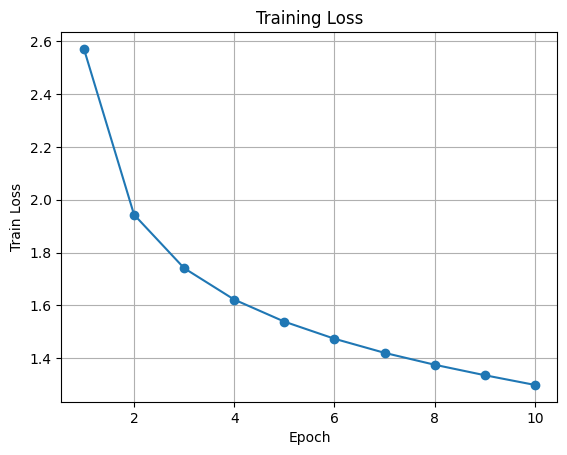

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs+1), train_losses, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/translation_transformer.pth')

In [11]:
def greedy_decode_batch(model, src, tokenizer, device, max_len=100):
    model.eval()
    with torch.no_grad():
        batch_size = src.size(0)
        src = src.transpose(0, 1).to(device)  # (src_len, batch)
        src_key_padding_mask = (src.transpose(0,1) == tokenizer.pad_token_id).to(device)  # (batch, src_len)

        bos = tokenizer.bos_token_id or tokenizer.cls_token_id or tokenizer.pad_token_id
        eos = tokenizer.eos_token_id or tokenizer.sep_token_id or tokenizer.pad_token_id

        generated = torch.full((1, batch_size), bos, dtype=torch.long, device=device)  # (1, batch)

        finished = torch.zeros(batch_size, dtype=torch.bool, device=device)

        for _ in range(max_len):
            tgt_mask = model.transformer.generate_square_subsequent_mask(generated.size(0)).to(device)
            tgt_key_padding_mask = (generated.transpose(0,1) == tokenizer.pad_token_id)  # (batch, seq_len)

            out = model(src, generated,
                        src_key_padding_mask=src_key_padding_mask,
                        tgt_key_padding_mask=tgt_key_padding_mask)

            next_tokens = out[-1].argmax(dim=-1)  # (batch,)
            generated = torch.cat([generated, next_tokens.unsqueeze(0)], dim=0)

            finished |= (next_tokens == eos)
            if finished.all():
                break

        results = []
        generated = generated.transpose(0,1).cpu().tolist()  # (batch, seq_len)
        for seq in generated:
            results.append(tokenizer.decode(seq, skip_special_tokens=True))
        return results


In [13]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.6 MB/s eta 0:00:00


In [14]:
import sacrebleu

def compute_bleu(references, hypotheses):
    sacre = sacrebleu.corpus_bleu(hypotheses, [references])
    return {
        "BLEU": sacre.score,
        "BLEU-short": sacrebleu.corpus_bleu(hypotheses, [references]).score
    }

def test_model(model, dataloader, tokenizer, device, max_len=100):
    all_hypotheses = []
    all_references = []

    for src_batch, tgt_batch in tqdm(dataloader, desc="Testing"):
        hypotheses = greedy_decode_batch(model, src_batch, tokenizer, device, max_len=max_len)

        for ref_ids in tgt_batch.tolist():
            all_references.append(tokenizer.decode(ref_ids, skip_special_tokens=True))
        all_hypotheses.extend(hypotheses)

    import sacrebleu
    bleu = sacrebleu.corpus_bleu(all_hypotheses, [all_references])

    return bleu.score, all_references[:5], all_hypotheses[:5]

In [18]:
test_dataset = dataset['test']
test_dataloader = DataLoader(test_dataset, batch_size=1,
                              shuffle=True, collate_fn=collate_fn, num_workers=4)

bleu, refs_sample, hyps_sample = test_model(model, test_dataloader, tokenizer, device, max_len=60)
print(f"\nFinal BLEU score on test set: {bleu:.2f}")

print("\nПримеры перевода:")
for r, h in zip(refs_sample[:5], hyps_sample[:5]):
    print(f"REF: {r}")
    print(f"HYP: {h}")

Testing: 100%|██████████| 3001/3001 [20:53<00:00,  2.39it/s]



Final BLEU score on test set: 0.20

Примеры перевода:
REF: Ранее сообщалось, что администрация Барака Обамы допускает возможность применения санкций против государства, хакеры которого
HYP: В связи с отметил, что он отмечение подчеркнули от проведен
REF: 25 апреля 2008 года назначен руководителем протокола председателя правительства Российской Федерации, заместителем Руководителя Аппа
HYP: В связи с представитель представительства представительства
REF: Не все ключевые ресурсы Намибии являются исчерпаемыми.
HYP: Несмотря на изличные не изличные несовершенных ключевых нес
REF: Этот фактор может тормозить восстановление экономики, поскольку расходы домохозяйств вносят немалый вклад в ВВП.
HYP: В связи с тем отношении проведения под подготовке под после
REF: Хансфорд, 62 лет, говорит, что воды Бивер-Крик, которые находятся обычно в более, чем 400 футах от его дома, быстро поднялись за но
HYP: В своей семье сообщения под вопросам в своей страны по прои


In [ ]:
if not model:
  model = TranslationTramsformer(tokenizer.vocab_size)
  model.load_state_dict(torch.load('/content/my_model.pth'))

In [19]:
def translate_sentence(model, tokenizer, sentence, device, max_len=50):
    model.eval()

    src_enc = tokenizer(
        [sentence],
        return_tensors="pt",
        truncation=True,
        padding="longest",
        max_length=128
    ).to(device)

    src_ids = src_enc["input_ids"].transpose(0, 1)  # [seq_len, batch]
    src_pad_mask = (src_ids == tokenizer.pad_token_id).transpose(0, 1).to(device)

    start_token = tokenizer.bos_token_id or tokenizer.cls_token_id or tokenizer.pad_token_id
    eos_token = tokenizer.eos_token_id or tokenizer.sep_token_id or tokenizer.pad_token_id

    generated_tokens = [start_token]
    for _ in range(max_len):
        tgt_input = torch.tensor(generated_tokens, dtype=torch.long, device=device).unsqueeze(1)
        tgt_pad_mask = (tgt_input == tokenizer.pad_token_id).transpose(0, 1)

        with torch.no_grad():
            output = model(src_ids, tgt_input, src_pad_mask, tgt_pad_mask)

        next_token = output[-1, 0].argmax().item()
        if next_token == eos_token:
            break
        generated_tokens.append(next_token)

    translation = tokenizer.decode(generated_tokens, skip_special_tokens=True)
    return translation


In [23]:
example_sentences = [
    "Hello, how are you?",
    "The transformer model is very powerful for sequence-to-sequence tasks.",
    "In 2017, researchers proposed the architecture known as 'Attention Is All You Need'.",
    "Where are you from?"
]

for s in example_sentences:
    print("EN:", s)
    print("RU:", translate_sentence(model, tokenizer, s, device))
    print()

EN: Hello, how are you?
RU: На то на применение на по страны на представитель

EN: The transformer model is very powerful for sequence-to-sequence tasks.
RU: В соответствии с проведения проведения проведения

EN: In 2017, researchers proposed the architecture known as 'Attention Is All You Need'.
RU: В связи с тем подписания в семьерной по под сельс

EN: Where are you from?
RU: В случае на на стоящеее на на на стоящеее на на н

